## AAI 695 | Homework 1 | Cameron Calder | 1/29/2023
### Problem 1
Explain the key properties of supervised, unsupervised, online, batch, model-based, and instance-based learning:
1. **Supervised learning** is when a machine learning algorithm is trained using labeled data. This means the algorithm starts with some prior knowledge of the correct output and what to look for.  
2. **Unsupervised learning** is when a machine learning algorithm is trained using unlabeled data. This lets the algorithm learn without prior knowledge of any ground truths, so it can make inferences on patterns in the dataset independently. This makes it easier for the system to find hidden patterns but can also reduce accuracy in comparison to supervised learning since there is less information about the inputs and outputs.  
3. **Online learning** is an algorithm training method, also known as out-of-core learning, where training instances are fed into the system sequentially and used to update predictions methods over time. This allows the system to incrementally adapt at each learning step based on new data and throw out old instances, reducing computing resources. This means systems can be trained with datasets larger than the available memory, but makes performance very dependent on data quality and system monitoring.
4. **Batch learning** is when a system is trained using all the available data at once, usually offline. Decision rules are made based on what it learned from the training data and then is run against the test data. Since batch learning requires processing very large datasets as one unit, it takes a much longer time and more computing power than online learning.    
5. **Model-based learning** is a type of machine learning system that uses a base model, such as a linear function, to generalize a training dataset and make predictions.
6. **Instance-based learning** is a type of machine learning system that learns using labeled training data and generalizes by measuring the similarity of instances.

### Problem 2
In this problem, we write a program to estimate the parameters for an unknown polynomial using the polyfit() function of the numpy package.
#### 1. Please plot the noisy data and the polynomial you found (in the same figure). You can use any value of m selected from 2, 3, 4, 5, 6.

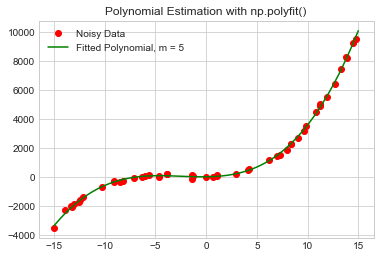

In [204]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-whitegrid')

noise_scale = 100
number_of_samples = 50

# Training dataset
x = 30*(np.random.rand(number_of_samples, 1) - 0.5)
y = 5 * x + 15 * x**2 + 2 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)

x,y = x.reshape(number_of_samples,), y.reshape(number_of_samples,)

m = 5
# fit a polynomial of degree m to the noisy data (x,y) and reformat to use as a transformer
poly = np.poly1d(np.polyfit(x,y,m))
# print(poly)

# create a test dataset by sampling points along the x-axis
t = np.linspace(-15,15,number_of_samples)

# apply the fitted polynomial to the test set and plot over the noisy data
plt.plot(x,y,'ro', label = "Noisy Data")
plt.plot(t, poly(t), 'g-', label = "Fitted Polynomial, m = "+str(m))

plt.legend()
plt.title("Polynomial Estimation with np.polyfit()")

plt.show()

#### 2. Plot MSE versus order m, for m = 1, 2, 3, 4, 5, 6, 7, 8 respectively. Identify the best choice of m.
Based on the graph shown below, the best choice of m is 3 or higher, since there is minimal changes in MSE after order 2. This means that a 3rd order polynomial is the best estimate of the noisy data, since it is the lowest order with a low MSE score. 

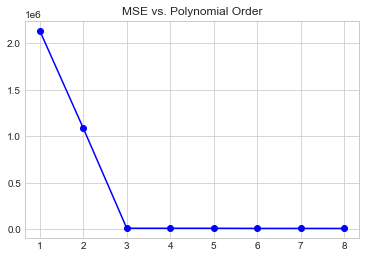

In [205]:
from sklearn.metrics import mean_squared_error

order = [1,2,3,4,5,6,7,8]
MSE = {}

for m in order:
    poly = np.poly1d(np.polyfit(x,y,m))
    MSE[m] = np.sum([(i-j)**2 for i,j in zip(poly(x),y)])/number_of_samples

a,b = zip(*MSE.items())
plt.plot(a,b,"-bo")

plt.title("MSE vs. Polynomial Order")

plt.show()

#### 3. Change variable noise_scale to 200, 300, 400, 600, 800, 1000 respectively, re-run the algorithm and plot the polynomials with the m found in #2. Discuss the impact of noise scale to the accuracy of the returned parameters (you need to plot a figure like in #1 for EACH choice of noise_scale).
Increasing the noise scale increases the dataset's variance. This can be seen in how the spread of original data increases with the noise scale. The trends in the data increase in complexity with a higher variance, making it more difficult to fit the data to the 3rd degree polynomial model and decreasing the accuracy of the returned predictions. This is also shown by the increasing RMSE as noise scale increases.

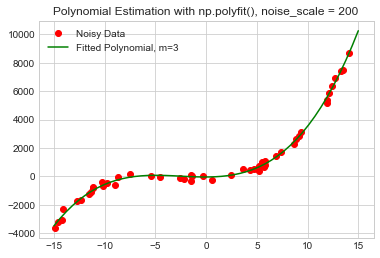

MSE = 33191.224803034704
RMSE = 182.18458991647648


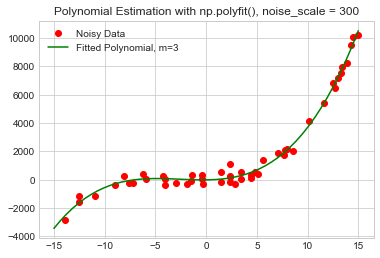

MSE = 99015.16799790827
RMSE = 314.66675705881016


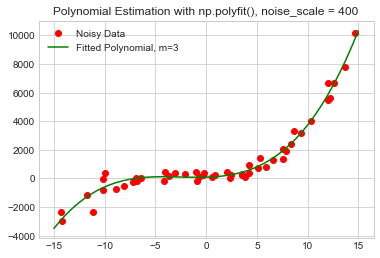

MSE = 155865.08456677222
RMSE = 394.79752350638194


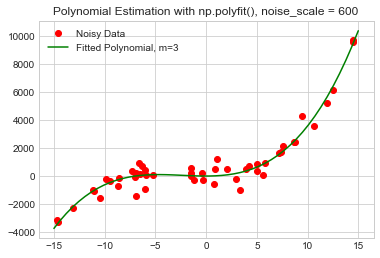

MSE = 271594.0388588125
RMSE = 521.1468496103689


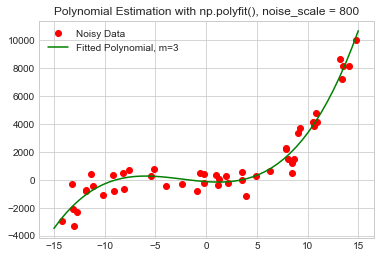

MSE = 471575.766653922
RMSE = 686.713744331597


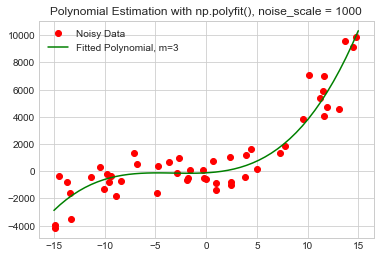

MSE = 1202924.4879489653
RMSE = 1096.779142739761


In [206]:
noise_scale = [200,300,400,600,800,1000]
number_of_samples = 50

for noise in noise_scale:
    x = 30*(np.random.rand(number_of_samples, 1) - 0.5)
    y = 5 * x + 15 * x**2 + 2 * x**3 + noise*np.random.randn(number_of_samples, 1)

    x,y = x.reshape(number_of_samples,), y.reshape(number_of_samples,)
    
    m = 3
    # fit a polynomial of degree m to the noisy data (x,y) and reformat to use as a transformer
    poly = np.poly1d(np.polyfit(x,y,m))
    
    MSE_noise = np.sum([(i-j)**2 for i,j in zip(poly(x),y)])/number_of_samples

    # create a test set by sampling points along the x-axis
    t = np.linspace(-15,15,number_of_samples)

    # apply the fitted polynomial to the test set and plot over the noisy data
    plt.plot(x,y,'ro', label = "Noisy Data")
    plt.plot(t, poly(t), 'g-', label = "Fitted Polynomial, m=3")

    plt.legend()
    plt.title("Polynomial Estimation with np.polyfit(), noise_scale = "+str(noise))

    plt.show()
    print("MSE = "+str(MSE_noise))
    print("RMSE = "+str(np.sqrt(MSE_noise)))

#### 4. Change variable number_of_samples to 40, 30, 20, 10 respectively, re-ran the algorithm and plot the polynomials with the m found in #2. Discuss the impact of the number of samples to the accuracy of the returned parameters (you need to plot a figure like in #1 for EACH choice of number_of_samples).
As the number of samples decreases, the prediction accuracy decreases. This can be seen by both MSE and RMSE decreasing as sample size decreases, except for a sample size of 10, since it is too small to generalize the data well. This caused overfitting and increases the RMSE and MSE since it fits closely to the training data, but is unlikely to be able to fit new test data accurately, make it the worst model overall.

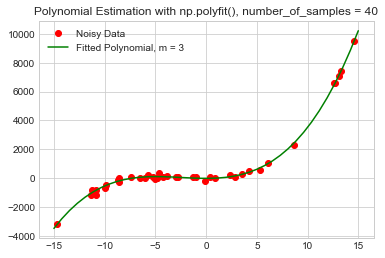

MSE = 12463.436996622524
RMSE = 111.63976440597912


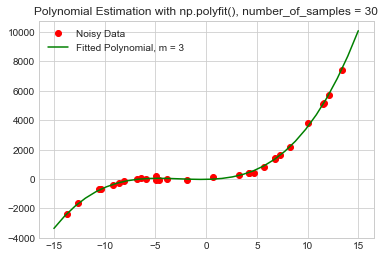

MSE = 6344.391576086893
RMSE = 79.65168909751314


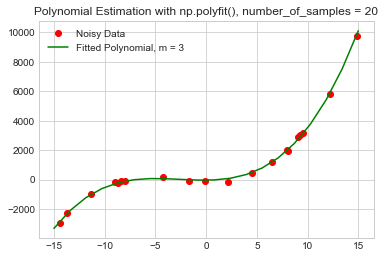

MSE = 6910.472303601707
RMSE = 83.12925058967936


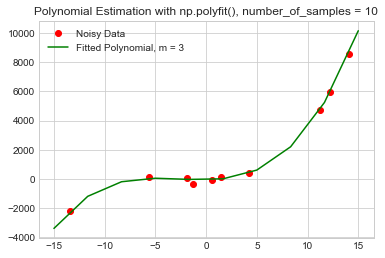

MSE = 13468.409628112862
RMSE = 116.05347744946233


In [207]:
noise_scale = 100
number_of_samples = [40,30,20,10]

for samples in number_of_samples:
    x = 30*(np.random.rand(samples, 1) - 0.5)
    y = 5 * x + 15 * x**2 + 2 * x**3 + noise_scale*np.random.randn(samples, 1)

    x,y = x.reshape(samples,), y.reshape(samples,)

    m = 3
    # fit a polynomial of degree m to the noisy data (x,y) and reformat to use as a transformer
    poly = np.poly1d(np.polyfit(x,y,m))
    
    MSE_samples = mean_squared_error(y,poly(x))

    # create a test set by sampling points along the x-axis
    t = np.linspace(-15,15,samples)

    # apply the fitted polynomial to the test set and plot over the noisy data
    plt.plot(x,y,'ro', label = "Noisy Data")
    plt.plot(t, poly(t), 'g-', label = "Fitted Polynomial, m = "+str(m))

    plt.legend()
    plt.title("Polynomial Estimation with np.polyfit(), number_of_samples = "+str(samples))

    plt.show()
    print("MSE = "+str(MSE_samples))
    print("RMSE = "+str(np.sqrt(MSE_samples)))